# Imports

In [426]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as msno
import numpy as np
import warnings

# Data

In [427]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

dataset = pd.concat([train_data, pd.merge(test_data, gender_submission, how='outer', on='PassengerId')], ignore_index=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [428]:
dataset.shape

(1309, 12)

In [429]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [430]:
dataset.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [431]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# Vizualization

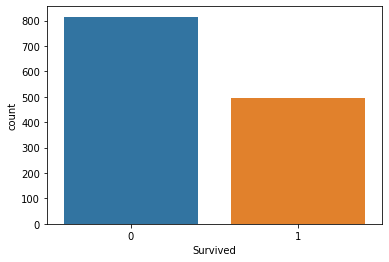

In [432]:
sns.countplot(x=dataset['Survived']);

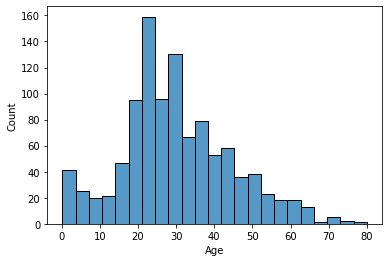

In [433]:
sns.histplot(x=dataset['Age']);

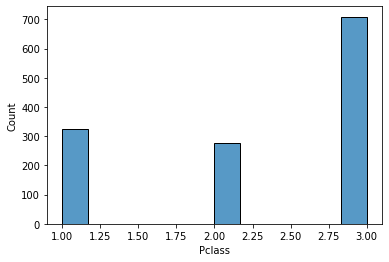

In [434]:
sns.histplot(x=dataset['Pclass']);

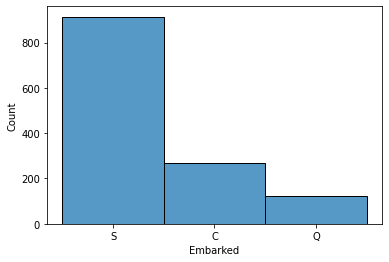

In [435]:
sns.histplot(x=dataset['Embarked']);

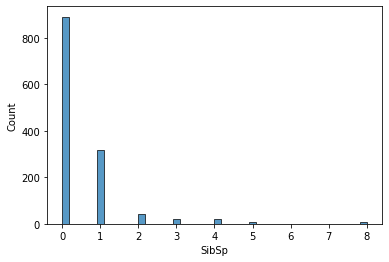

In [436]:
sns.histplot(x=dataset['SibSp']);

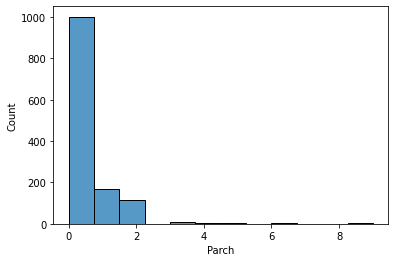

In [437]:
sns.histplot(x=dataset['Parch']);

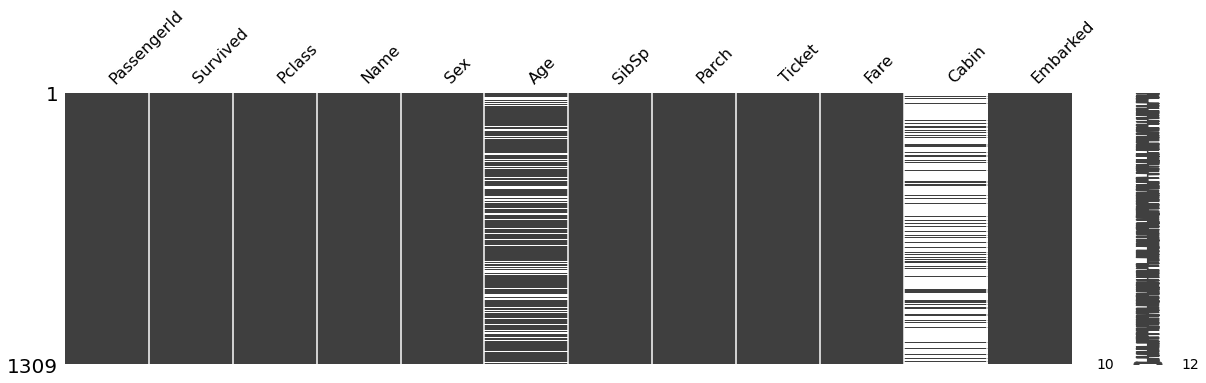

In [438]:
msno.matrix(dataset, figsize=(20,5));

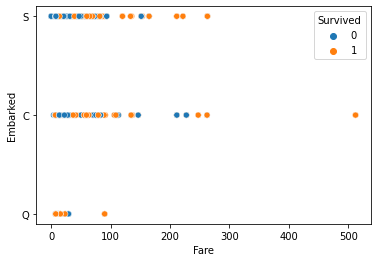

In [439]:
sns.scatterplot(x='Fare', y='Embarked', hue='Survived', data=dataset);

# Prepare Data

### Missing Data

In [440]:
dataset.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

#### Age

In [441]:
dataset['Age'].fillna(math.floor(dataset['Age'].mean()), inplace=True)

#### Fare

In [442]:
dataset['Fare'].fillna(math.floor(dataset['Fare'].mean()), inplace=True)

#### Cabin

In [443]:
dataset.rename(columns={"Cabin": "HasCabin"}, inplace=True)
dataset['HasCabin'] = dataset["HasCabin"].apply(lambda x: 0 if type(x) == float else 1)


#### Embarked

In [444]:
# Embarked, mean = S
dataset['Embarked'].fillna('S', inplace=True)


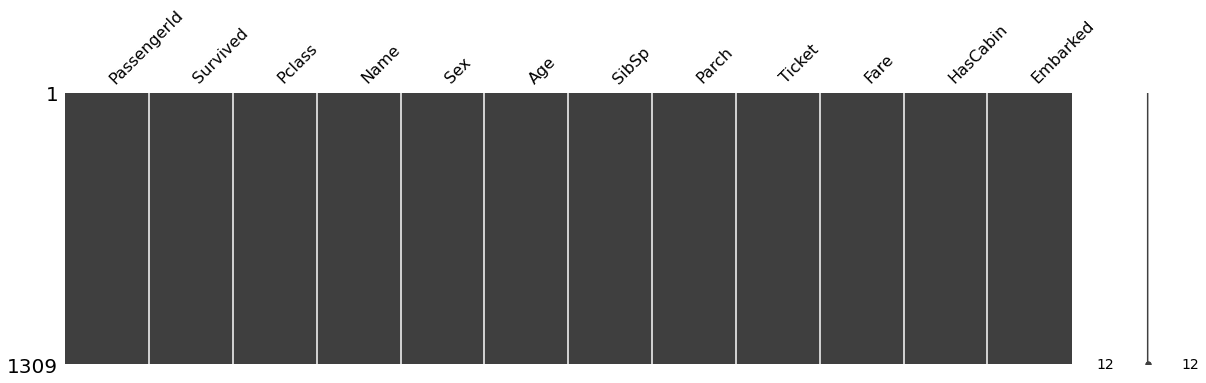

In [445]:
msno.matrix(dataset, figsize=(20,5));

### Categorical Atribute

In [446]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  HasCabin     1309 non-null   int64  
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 122.8+ KB


#### Sex

In [447]:
dataset['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [448]:
dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if x == 'male' else 1)

#### Embarked

In [449]:
dataset['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [450]:
dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [451]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   int64  
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  HasCabin     1309 non-null   int64  
 11  Embarked     1309 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 122.8+ KB


### Combining Data

#### Title

In [452]:
dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
dataset['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [453]:
dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev', 'Jonkheer'], 'Rare')
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Don', 'Sir', 'Dona'], 'Royalty')
dataset['Title'].value_counts()

Mr         757
Miss       260
Mrs        197
Master      61
Rare        24
Royalty      5
Ms           2
Mlle         2
Mme          1
Name: Title, dtype: int64

In [454]:
dataset['Title'] = dataset['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})
dataset['Title'].value_counts()

Mr         757
Miss       264
Mrs        198
Master      61
Rare        24
Royalty      5
Name: Title, dtype: int64

In [455]:
dataset[['Title', 'Survived']].groupby('Title', as_index=False).mean().sort_values(by='Survived',ascending=False)

,Title,Survived
3,Mrs,0.868687
5,Royalty,0.800000
1,Miss,0.791667
0,Master,0.377049
4,Rare,0.208333
2,Mr,0.107001


In [456]:
dataset['Title'] = dataset['Title'].map({'Mrs': 0, 'Miss': 1, 'Master': 2, 'Rare': 3, 'Mr': 4, 'Royalty': 5})

In [457]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,4


#### IsAlone

In [458]:
dataset['IsAlone'] = (dataset['SibSp'] + dataset['Parch']) == 0
dataset['IsAlone'].head()

0    False
1    False
2     True
3    False
4     True
Name: IsAlone, dtype: bool

In [459]:
dataset['IsAlone'] = dataset['IsAlone'].map({True: 1, False: 0})
dataset['IsAlone'].head()

0    0
1    0
2    1
3    0
4    1
Name: IsAlone, dtype: int64

In [460]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked,Title,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,4,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,4,1


#### New Fare

In [461]:
dataset['FareClass'] = pd.cut(dataset["Fare"],bins=4, labels=["0","1","2","3"])
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,HasCabin,Embarked,Title,IsAlone,FareClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,4,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,4,1,0


In [462]:
dataset['FareClass'] = dataset['FareClass'].astype(int)

# Data and Class

In [464]:
columns = ['Pclass', 'Sex', 'Age', 'Embarked', 'HasCabin', 'Title', 'IsAlone', 'FareClass']
target = ['Survived']
dataset[columns].head()

,Pclass,Sex,Age,Embarked,HasCabin,Title,IsAlone,FareClass
0,3,0,22.0,0,0,4,0,0
1,1,1,38.0,1,1,0,0,0
2,3,1,26.0,0,0,1,1,0
3,1,1,35.0,0,1,0,0,0
4,3,0,35.0,0,0,4,1,0


In [465]:
x = dataset[columns].values
y = dataset[target].values
y = y.reshape(-1,)

print(x.shape, y.shape)

(1309, 8) (1309,)


# Normalization

In [466]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(x)
X[0]

array([ 0.84191642, -0.74349692, -0.5980002 , -0.60343572, -0.53937651,
        0.8009123 , -1.23375767, -0.21163509])

# Split

In [467]:
x_train, x_test, y_train, y_test = X[:891], X[891:], y[:891], y[891:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(891, 8) (891,)
(418, 8) (418,)


# Model

In [468]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate

In [469]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "MLP": MLPClassifier(max_iter=1000),
    "SVM": SVC()
}

In [470]:
results = pd.DataFrame(columns=["classifier", "accuracy", "f1"])

for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(model, x_train, y_train, cv=5, scoring=(['accuracy', 'f1']))

    results = results.append({
        "classifier": name,
        "accuracy": cv_results['test_accuracy'].mean(),
        "f1": cv_results['test_f1'].mean(),
    }, ignore_index=True)

In [471]:
results["overall"] = (results["accuracy"] + results["f1"]) / 2
results = results.sort_values("overall", ascending=False)
results

,classifier,accuracy,f1,overall
1,LR,0.810313,0.750888,0.780601
5,SVM,0.810357,0.720888,0.765623
0,KNN,0.802498,0.725254,0.763876
4,MLP,0.805875,0.718507,0.762191
2,DT,0.793522,0.718625,0.756073
3,RF,0.785657,0.711601,0.748629


# Submission

In [472]:
X[891:]

array([[ 0.84191642, -0.74349692,  0.37226242, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       [ 0.84191642,  1.34499549,  1.34252503, ..., -1.63014672,
        -1.23375767, -0.21163509],
       [-0.35209072, -0.74349692,  2.50684017, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       ...,
       [ 0.84191642, -0.74349692,  0.68274645, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       [ 0.84191642, -0.74349692, -0.05465314, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       [ 0.84191642, -0.74349692, -0.05465314, ..., -0.41461721,
        -1.23375767, -0.21163509]])

In [473]:
x_test_submission = X[891:]
y_test_submission = gender_submission['Survived'].values
print(x_test_submission.shape, y_test_submission.shape)

(418, 8) (418,)


In [474]:
x_test_submission

array([[ 0.84191642, -0.74349692,  0.37226242, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       [ 0.84191642,  1.34499549,  1.34252503, ..., -1.63014672,
        -1.23375767, -0.21163509],
       [-0.35209072, -0.74349692,  2.50684017, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       ...,
       [ 0.84191642, -0.74349692,  0.68274645, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       [ 0.84191642, -0.74349692, -0.05465314, ...,  0.8009123 ,
         0.81053194, -0.21163509],
       [ 0.84191642, -0.74349692, -0.05465314, ..., -0.41461721,
        -1.23375767, -0.21163509]])

In [475]:
model_s = LogisticRegression(max_iter=1000)
model_s.fit(x_train, y_train)
predict = model_s.predict(x_test_submission)

In [476]:
gender_submission['Survived'] = predict
gender_submission.to_csv('submission.csv', index=False)